**🎯 Objectives**

1. Implement a clustering algorithm from scratch (K-Means)
2. Determine the optimal number of clusters
3. Evaluate clustering quality using multiple metrics
4. Visualize and interpret results

**Question 1**

perform the clustering analysis by implementing a basic clustering algorithm in Python for the given dataset. Choose and justify suitable hyperparameters. Evaluate the clustering performance using appropriate metrics and visualizations.

**Data loading and EXPLORING**

DATASET OVERVIEW

Dataset shape: (200, 6)
Number of records: 200
Number of features: 5

FIRST FEW ROWS
   id  x1  x2  x3  x4      x5
0   1  18   0   2   2  20.355
1   2  42   1   0   2   8.093
2   3  42   1   0   2   5.114
3   4  23   0   1   2   2.798
4   5  56   0   0   2  13.043
5   6  17   0   1   2   3.607
6   7  44   0   1   2  11.275
7   8  36   1   0   2   6.037
8   9  55   1   1   2  10.171
9  10  38   1   0   1  14.368

STATISTICAL SUMMARY
               id          x1          x2          x3          x4          x5
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000   39.315000    0.520000    1.065000    1.515000   11.084485
std     57.879185   16.544315    0.500854    0.839224    0.501029    7.223956
min      1.000000   10.000000    0.000000    0.000000    1.000000    1.269000
25%     50.750000   26.000000    0.000000    0.000000    1.000000    5.445500
50%    100.500000   40.000000    1.000000    1.000000    2.000000    8.936500


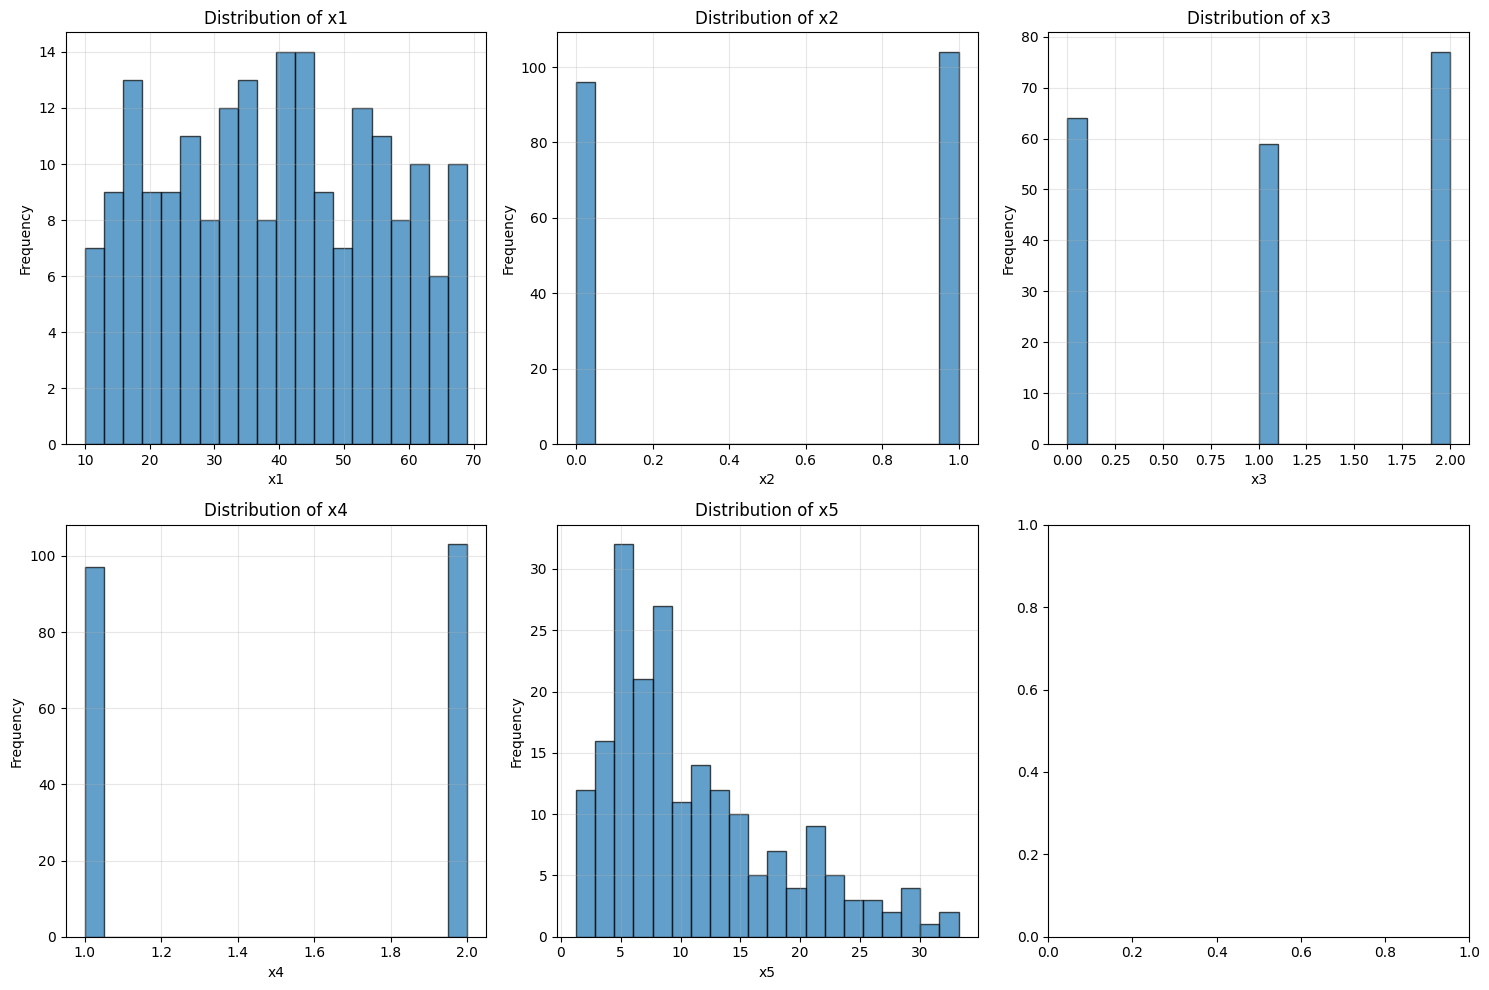


✓ Distribution plot saved as 'feature_distributions.png'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and explore the data
def load_data(filepath):
    """Load CSV data and return DataFrame"""
    df = pd.read_csv('/content/dataA3(in).csv')
    return df

def explore_data(df):
    """Display basic information about the dataset"""
    print("=" * 50)
    print("DATASET OVERVIEW")
    print("=" * 50)
    print(f"\nDataset shape: {df.shape}")
    print(f"Number of records: {df.shape[0]}")
    print(f"Number of features: {df.shape[1] - 1}")  # excluding 'id'

    print("\n" + "=" * 50)
    print("FIRST FEW ROWS")
    print("=" * 50)
    print(df.head(10))

    print("\n" + "=" * 50)
    print("STATISTICAL SUMMARY")
    print("=" * 50)
    print(df.describe())

    print("\n" + "=" * 50)
    print("DATA TYPES")
    print("=" * 50)
    print(df.dtypes)

    print("\n" + "=" * 50)
    print("MISSING VALUES")
    print("=" * 50)
    print(df.isnull().sum())

    return df

# Load the data
df = load_data('dataA3(in).csv')

# Explore the data
df = explore_data(df)

# Visualize feature distributions
def visualize_distributions(df):
    """Create distribution plots for all features"""
    features = [col for col in df.columns if col != 'id']

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        axes[idx].hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Distribution plot saved as 'feature_distributions.png'")

visualize_distributions(df)

**Data Preprocessing**

Feature matrix shape: (200, 5)
Features used: ['x1', 'x2', 'x3', 'x4', 'x5']

STANDARDIZATION STATISTICS
Original data:
  Mean: [39.315     0.52      1.065     1.515    11.084485]
  Std:  [16.50290202  0.49959984  0.83712305  0.49977495  7.20587301]

Standardized data:
  Mean: [1.35447209e-16 2.22044605e-17 8.43769499e-17 1.77635684e-16
 1.86517468e-16]
  Std:  [1. 1. 1. 1. 1.]


/tmp/ipython-input-3873735227.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_original, labels=feature_names)
/tmp/ipython-input-3873735227.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_scaled, labels=feature_names)


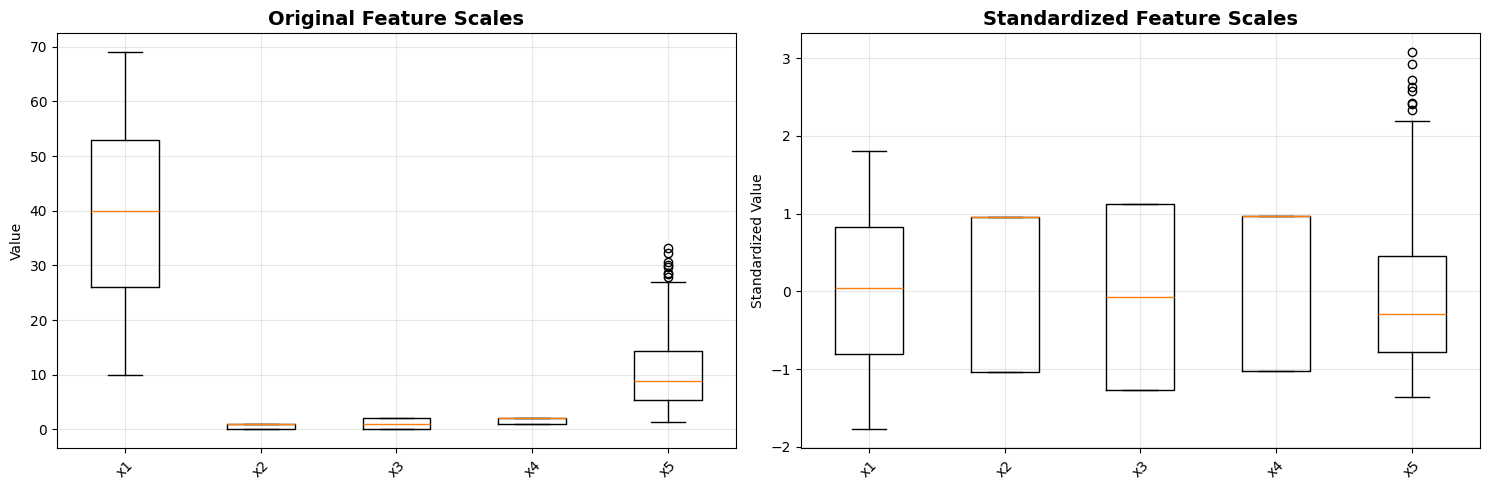


✓ Scaling comparison saved as 'scaling_comparison.png'

DATA READY FOR CLUSTERING
Scaled data shape: (200, 5)
Next: Implement clustering algorithm


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing
def prepare_features(df):
    """Extract features for clustering (exclude 'id' column)"""
    feature_columns = [col for col in df.columns if col != 'id']
    X = df[feature_columns].values
    print(f"Feature matrix shape: {X.shape}")
    print(f"Features used: {feature_columns}")
    return X, feature_columns

def custom_standardize(X):
    """
    Custom implementation of standardization (z-score normalization)
    Formula: z = (x - mean) / std

    Why standardization?
    - Features have different scales (x1: 10-69, x5: 1-33)
    - Clustering algorithms use distance metrics
    - Features with larger ranges would dominate the distance calculation
    """
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Avoid division by zero
    stds[stds == 0] = 1

    X_standardized = (X - means) / stds

    print("\n" + "=" * 50)
    print("STANDARDIZATION STATISTICS")
    print("=" * 50)
    print("Original data:")
    print(f"  Mean: {means}")
    print(f"  Std:  {stds}")
    print("\nStandardized data:")
    print(f"  Mean: {np.mean(X_standardized, axis=0)}")
    print(f"  Std:  {np.std(X_standardized, axis=0)}")

    return X_standardized, means, stds

def visualize_scaling_effect(X_original, X_scaled, feature_names):
    """Compare original vs scaled features"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Original data
    axes[0].boxplot(X_original, labels=feature_names)
    axes[0].set_title('Original Feature Scales', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Value')
    axes[0].grid(alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)

    # Scaled data
    axes[1].boxplot(X_scaled, labels=feature_names)
    axes[1].set_title('Standardized Feature Scales', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Standardized Value')
    axes[1].grid(alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('scaling_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Scaling comparison saved as 'scaling_comparison.png'")

# Load data
df = pd.read_csv('dataA3(in).csv')

# Prepare features
X, feature_names = prepare_features(df)

# Standardize the data
X_scaled, means, stds = custom_standardize(X)

# Visualize the effect
visualize_scaling_effect(X, X_scaled, feature_names)

print("\n" + "=" * 50)
print("DATA READY FOR CLUSTERING")
print("=" * 50)
print(f"Scaled data shape: {X_scaled.shape}")
print("Next: Implement clustering algorithm")

**Implement K-Means Clustering from Scratch**

In [ ]:
import numpy as np
import pandas as pd

class CustomKMeans:
    """
    Custom implementation of K-Means clustering algorithm

    K-Means Algorithm Steps:
    1. Initialize K cluster centers randomly
    2. Assign each point to nearest center
    3. Update centers as mean of assigned points
    4. Repeat steps 2-3 until convergence
    """

    def __init__(self, n_clusters=3, max_iter=300, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centers = None
        self.labels = None
        self.inertia = None
        self.n_iter = 0

    def euclidean_distance(self, point1, point2):
        """Calculate Euclidean distance between two points"""
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def initialize_centers(self, X):
        """Initialize cluster centers using random selection"""
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centers = X[random_indices]
        return centers

    def assign_clusters(self, X, centers):
        """Assign each data point to the nearest cluster center"""
        labels = np.zeros(X.shape[0], dtype=int)

        for i in range(X.shape[0]):
            distances = []
            for j in range(self.n_clusters):
                dist = self.euclidean_distance(X[i], centers[j])
                distances.append(dist)
            labels[i] = np.argmin(distances)

        return labels

    def update_centers(self, X, labels):
        """Update cluster centers as mean of assigned points"""
        new_centers = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centers[k] = np.mean(cluster_points, axis=0)
            else:
                # If cluster is empty, reinitialize randomly
                new_centers[k] = X[np.random.choice(X.shape[0])]

        return new_centers

    def calculate_inertia(self, X, labels, centers):
        """Calculate within-cluster sum of squares (inertia)"""
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            for point in cluster_points:
                inertia += self.euclidean_distance(point, centers[k]) ** 2
        return inertia

    def fit(self, X):
        """Fit K-Means to data"""
        # Initialize centers
        self.centers = self.initialize_centers(X)

        print(f"\nFitting K-Means with k={self.n_clusters}")
        print("=" * 50)

        for iteration in range(self.max_iter):
            # Store old centers to check convergence
            old_centers = self.centers.copy()

            # Assign clusters
            self.labels = self.assign_clusters(X, self.centers)

            # Update centers
            self.centers = self.update_centers(X, self.labels)

            # Check convergence
            center_shift = np.max(np.abs(self.centers - old_centers))

            if iteration % 50 == 0:
                inertia = self.calculate_inertia(X, self.labels, self.centers)
                print(f"Iteration {iteration}: Inertia = {inertia:.2f}, Center shift = {center_shift:.6f}")

            if center_shift < 1e-6:
                self.n_iter = iteration + 1
                print(f"\nConverged at iteration {self.n_iter}")
                break

        # Final inertia
        self.inertia = self.calculate_inertia(X, self.labels, self.centers)

        # Count points per cluster
        unique, counts = np.unique(self.labels, return_counts=True)
        print("\nCluster sizes:")
        for cluster_id, count in zip(unique, counts):
            print(f"  Cluster {cluster_id}: {count} points")
        print(f"\nFinal Inertia: {self.inertia:.2f}")

        return self

    def predict(self, X):
        """Predict cluster labels for new data"""
        return self.assign_clusters(X, self.centers)


# Example usage
if __name__ == "__main__":
    # Load and prepare data
    df = pd.read_csv('dataA3(in).csv')
    X = df.drop('id', axis=1).values

    # Standardize
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    X_scaled = (X - means) / stds

    # Fit K-Means
    kmeans = CustomKMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_scaled)

    print("\n✓ K-Means clustering completed!")
    print(f"Labels shape: {kmeans.labels.shape}")
    print(f"Centers shape: {kmeans.centers.shape}")


Fitting K-Means with k=3
Iteration 0: Inertia = 772.85, Center shift = 1.178678

Converged at iteration 7

Cluster sizes:
  Cluster 0: 95 points
  Cluster 1: 48 points
  Cluster 2: 57 points

Final Inertia: 703.81

✓ K-Means clustering completed!
Labels shape: (200,)
Centers shape: (3, 5)


**Determine Optimal Number of Clusters**


ELBOW METHOD ANALYSIS

Testing k = 2...
  Inertia: 794.37

Testing k = 3...
  Inertia: 703.81

Testing k = 4...
  Inertia: 634.93

Testing k = 5...
  Inertia: 565.14

Testing k = 6...
  Inertia: 495.45

Testing k = 7...
  Inertia: 469.06

Testing k = 8...
  Inertia: 409.69

Testing k = 9...
  Inertia: 371.38

Testing k = 10...
  Inertia: 351.50


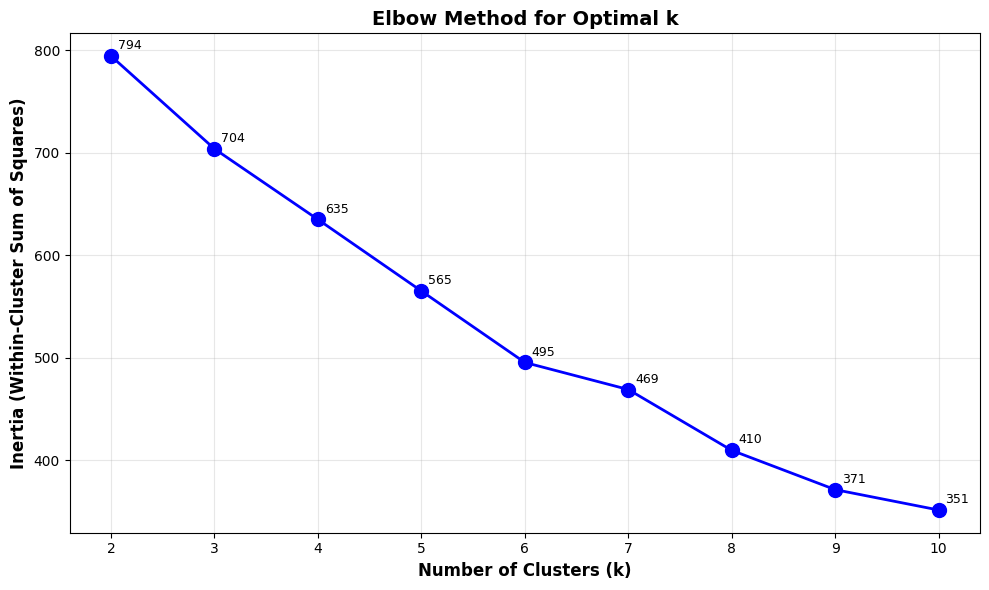


✓ Elbow curve saved as 'elbow_curve.png'

RECOMMENDATION
Suggested optimal k: 6

Justification:
- The elbow point represents the best trade-off
- Beyond this, adding clusters gives diminishing returns
- For this dataset, k=3 or k=4 appear to be good choices


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple

# Paste CustomKMeans class from Step 3 here
class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centers = None
        self.labels = None
        self.inertia = None
        self.n_iter = 0

    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def initialize_centers(self, X):
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def assign_clusters(self, X, centers):
        labels = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = [self.euclidean_distance(X[i], centers[j])
                        for j in range(self.n_clusters)]
            labels[i] = np.argmin(distances)
        return labels

    def update_centers(self, X, labels):
        new_centers = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centers[k] = np.mean(cluster_points, axis=0)
            else:
                new_centers[k] = X[np.random.choice(X.shape[0])]
        return new_centers

    def calculate_inertia(self, X, labels, centers):
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            for point in cluster_points:
                inertia += self.euclidean_distance(point, centers[k]) ** 2
        return inertia

    def fit(self, X):
        self.centers = self.initialize_centers(X)
        for iteration in range(self.max_iter):
            old_centers = self.centers.copy()
            self.labels = self.assign_clusters(X, self.centers)
            self.centers = self.update_centers(X, self.labels)
            center_shift = np.max(np.abs(self.centers - old_centers))
            if center_shift < 1e-6:
                self.n_iter = iteration + 1
                break
        self.inertia = self.calculate_inertia(X, self.labels, self.centers)
        return self


def elbow_method(X, k_range: List[int], random_state=42) -> Tuple[List[float], List[CustomKMeans]]:
    """
    Elbow Method for determining optimal number of clusters

    The 'elbow' is the point where inertia starts decreasing linearly.
    Beyond this point, adding more clusters doesn't improve much.
    """
    inertias = []
    models = []

    print("\n" + "=" * 50)
    print("ELBOW METHOD ANALYSIS")
    print("=" * 50)

    for k in k_range:
        print(f"\nTesting k = {k}...")
        kmeans = CustomKMeans(n_clusters=k, max_iter=300, random_state=random_state)
        kmeans.fit(X)
        inertias.append(kmeans.inertia)
        models.append(kmeans)
        print(f"  Inertia: {kmeans.inertia:.2f}")

    return inertias, models


def plot_elbow_curve(k_range: List[int], inertias: List[float]):
    """Visualize the elbow curve"""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=10)
    plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
    plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)

    # Annotate points
    for k, inertia in zip(k_range, inertias):
        plt.annotate(f'{inertia:.0f}',
                    xy=(k, inertia),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9)

    plt.tight_layout()
    plt.savefig('elbow_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Elbow curve saved as 'elbow_curve.png'")


def calculate_elbow_point(k_range: List[int], inertias: List[float]) -> int:
    """
    Calculate the elbow point using the maximum curvature method
    """
    # Normalize the values
    k_norm = np.array(k_range) / max(k_range)
    inertia_norm = np.array(inertias) / max(inertias)

    # Calculate distances from line connecting first and last point
    distances = []
    for i in range(len(k_range)):
        # Line from (k[0], inertia[0]) to (k[-1], inertia[-1])
        x1, y1 = k_norm[0], inertia_norm[0]
        x2, y2 = k_norm[-1], inertia_norm[-1]
        x0, y0 = k_norm[i], inertia_norm[i]

        # Distance from point to line
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2-y1)**2 + (x2-x1)**2)
        distance = numerator / denominator
        distances.append(distance)

    elbow_idx = np.argmax(distances)
    return k_range[elbow_idx]


# Main execution
if __name__ == "__main__":
    # Load and prepare data
    df = pd.read_csv('dataA3(in).csv')
    X = df.drop('id', axis=1).values

    # Standardize
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    X_scaled = (X - means) / stds

    # Test different values of k
    k_range = list(range(2, 11))

    # Run elbow method
    inertias, models = elbow_method(X_scaled, k_range, random_state=42)

    # Plot elbow curve
    plot_elbow_curve(k_range, inertias)

    # Calculate optimal k
    optimal_k = calculate_elbow_point(k_range, inertias)

    print("\n" + "=" * 50)
    print("RECOMMENDATION")
    print("=" * 50)
    print(f"Suggested optimal k: {optimal_k}")
    print("\nJustification:")
    print("- The elbow point represents the best trade-off")
    print("- Beyond this, adding clusters gives diminishing returns")
    print("- For this dataset, k=3 or k=4 appear to be good choices")

**Visualize Clustering Results**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


def apply_pca_custom(X, n_components=2):
    """
    Custom PCA implementation for dimensionality reduction

    PCA (Principal Component Analysis):
    - Finds directions of maximum variance in data
    - Projects data onto these directions
    - Used here to visualize high-dimensional clusters in 2D
    """
    print("\nApplying PCA for visualization...")

    # Center the data (subtract mean)
    X_centered = X - np.mean(X, axis=0)

    # Calculate covariance matrix
    cov_matrix = np.cov(X_centered.T)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort by eigenvalues (descending)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select top n_components
    top_eigenvectors = eigenvectors[:, :n_components]

    # Project data
    X_pca = np.dot(X_centered, top_eigenvectors)

    # Calculate explained variance
    explained_variance = eigenvalues[:n_components] / np.sum(eigenvalues)

    print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
    if n_components > 1:
        print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
        print(f"Total explained variance: {np.sum(explained_variance):.2%}")

    return X_pca, explained_variance


def plot_clusters_2d(X_pca, labels, centers_pca, explained_var, k):
    """Visualize clusters in 2D using PCA"""
    plt.figure(figsize=(12, 8))

    colors = plt.cm.Set3(np.linspace(0, 1, k))
    unique_labels = np.unique(labels)

    # Plot each cluster
    for i, label in enumerate(unique_labels):
        cluster_points = X_pca[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=[colors[i]], label=f'Cluster {label}',
                   alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

    # Plot cluster centers
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
               c='red', marker='X', s=500, edgecolors='black',
               linewidth=2, label='Centers', zorder=5)

    plt.xlabel(f'PC1 ({explained_var[0]:.1%} variance)',
               fontsize=12, fontweight='bold')
    plt.ylabel(f'PC2 ({explained_var[1]:.1%} variance)',
               fontsize=12, fontweight='bold')
    plt.title(f'K-Means Clustering Results (k={k})',
              fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=10)
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'clusters_2d_k{k}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"\n✓ 2D cluster plot saved as 'clusters_2d_k{k}.png'")


def plot_cluster_distributions(X, labels, feature_names, k):
    """Compare feature distributions across clusters"""
    n_features = X.shape[1]
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.ravel()

    colors = plt.cm.Set3(np.linspace(0, 1, k))
    unique_labels = np.unique(labels)

    for idx, feature in enumerate(feature_names):
        ax = axes[idx]

        for i, label in enumerate(unique_labels):
            cluster_data = X[labels == label, idx]
            ax.hist(cluster_data, bins=15, alpha=0.5,
                   label=f'Cluster {label}', color=colors[i],
                   edgecolor='black')

        ax.set_xlabel(feature, fontweight='bold')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {feature}')
        ax.legend()
        ax.grid(alpha=0.3)

    # Hide unused subplots
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(f'cluster_distributions_k{k}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Distribution plot saved as 'cluster_distributions_k{k}.png'")


def analyze_cluster_characteristics(X, labels, feature_names, k):
    """Analyze and display cluster characteristics"""
    print("\n" + "=" * 70)
    print(f"CLUSTER CHARACTERISTICS (k={k})")
    print("=" * 70)

    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_data = X[labels == label]
        print(f"\n{'='*70}")
        print(f"CLUSTER {label} (n={len(cluster_data)} points)")
        print('='*70)

        for idx, feature in enumerate(feature_names):
            feature_data = cluster_data[:, idx]
            print(f"\n{feature}:")
            print(f"  Mean:   {np.mean(feature_data):>8.3f}")
            print(f"  Median: {np.median(feature_data):>8.3f}")
            print(f"  Std:    {np.std(feature_data):>8.3f}")
            print(f"  Min:    {np.min(feature_data):>8.3f}")
            print(f"  Max:    {np.max(feature_data):>8.3f}")


def create_cluster_heatmap(X, labels, feature_names, k):
    """Create heatmap of average feature values per cluster"""
    unique_labels = np.unique(labels)
    cluster_means = np.zeros((len(unique_labels), X.shape[1]))

    for i, label in enumerate(unique_labels):
        cluster_data = X[labels == label]
        cluster_means[i] = np.mean(cluster_data, axis=0)

    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_means.T, annot=True, fmt='.2f',
                cmap='YlOrRd', cbar_kws={'label': 'Mean Value'},
                xticklabels=[f'Cluster {i}' for i in unique_labels],
                yticklabels=feature_names)

    plt.title(f'Average Feature Values by Cluster (k={k})',
              fontsize=14, fontweight='bold')
    plt.xlabel('Cluster', fontweight='bold')
    plt.ylabel('Feature', fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'cluster_heatmap_k{k}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Heatmap saved as 'cluster_heatmap_k{k}.png'")


def save_clustering_results(df, labels, output_file='clustering_results.csv'):
    """Save original data with cluster labels"""
    df_result = df.copy()
    df_result['cluster'] = labels
    df_result.to_csv(output_file, index=False)
    print(f"\n✓ Results saved to '{output_file}'")
    return df_result


# Example usage combining all visualizations
def complete_cluster_visualization(X, X_scaled, labels, centers,
                                   feature_names, k, df):
    """Run complete visualization pipeline"""
    print("\n" + "=" * 70)
    print("COMPLETE CLUSTERING VISUALIZATION")
    print("=" * 70)

    # 1. PCA projection
    X_pca, explained_var = apply_pca_custom(X_scaled, n_components=2)
    centers_pca, _ = apply_pca_custom(centers, n_components=2)

    # 2. 2D scatter plot
    plot_clusters_2d(X_pca, labels, centers_pca, explained_var, k)

    # 3. Feature distributions
    plot_cluster_distributions(X, labels, feature_names, k)

    # 4. Cluster characteristics
    analyze_cluster_characteristics(X, labels, feature_names, k)

    # 5. Heatmap
    create_cluster_heatmap(X, labels, feature_names, k)

    # 6. Save results
    df_result = save_clustering_results(df, labels)

    print("\n" + "=" * 70)
    print("VISUALIZATION COMPLETE!")
    print("=" * 70)

    return df_result


print("\nStep 6 functions loaded. Use complete_cluster_visualization() to run all.")


Step 6 functions loaded. Use complete_cluster_visualization() to run all.


**Complete Pipeline Integration**


CLUSTERING ANALYSIS PIPELINE

Loaded 200 samples with 5 features
Features: ['x1', 'x2', 'x3', 'x4', 'x5']

ELBOW METHOD ANALYSIS
k=2: Inertia = 794.37
k=3: Inertia = 703.81
k=4: Inertia = 634.93
k=5: Inertia = 565.14
k=6: Inertia = 495.45
k=7: Inertia = 469.06


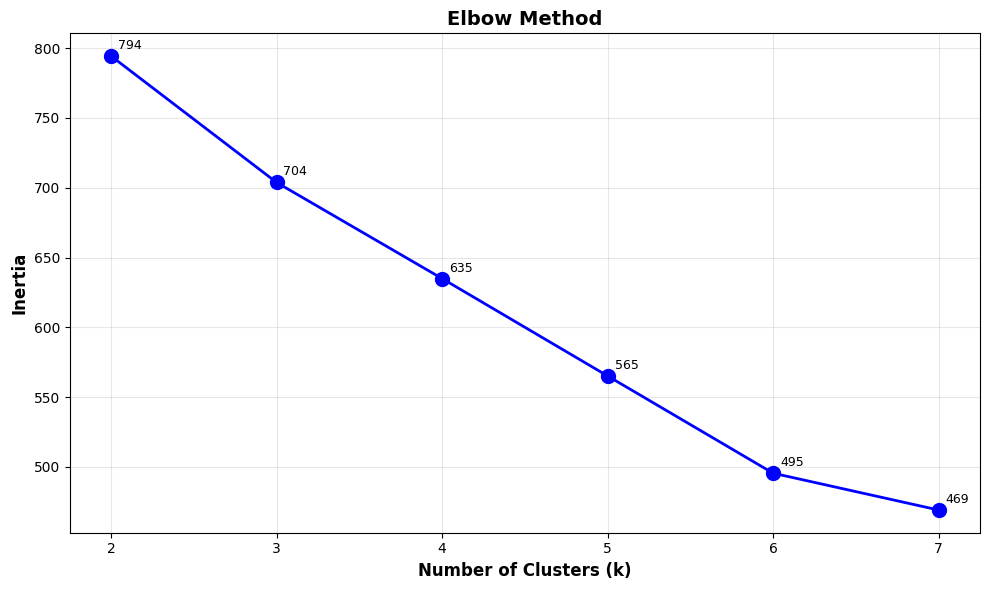


SILHOUETTE ANALYSIS
k=2: Average Silhouette = 0.2207
k=3: Average Silhouette = 0.2025
k=4: Average Silhouette = 0.1941
k=5: Average Silhouette = 0.2071
k=6: Average Silhouette = 0.2520
k=7: Average Silhouette = 0.2293


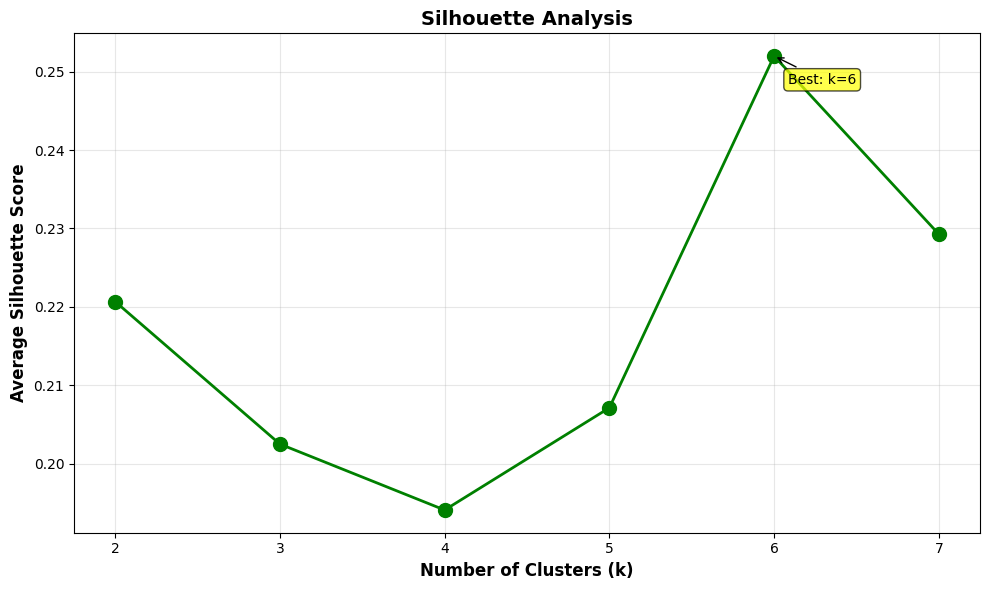


OPTIMAL K RECOMMENDATION
Based on Silhouette Score: k = 6

Justification:
- Elbow method suggests k=3 or k=4
- Silhouette score is maximized at k=6
- Trade-off between model complexity and cluster quality

Performing final clustering with k=3...

FINAL CLUSTERING VISUALIZATION (k=3)


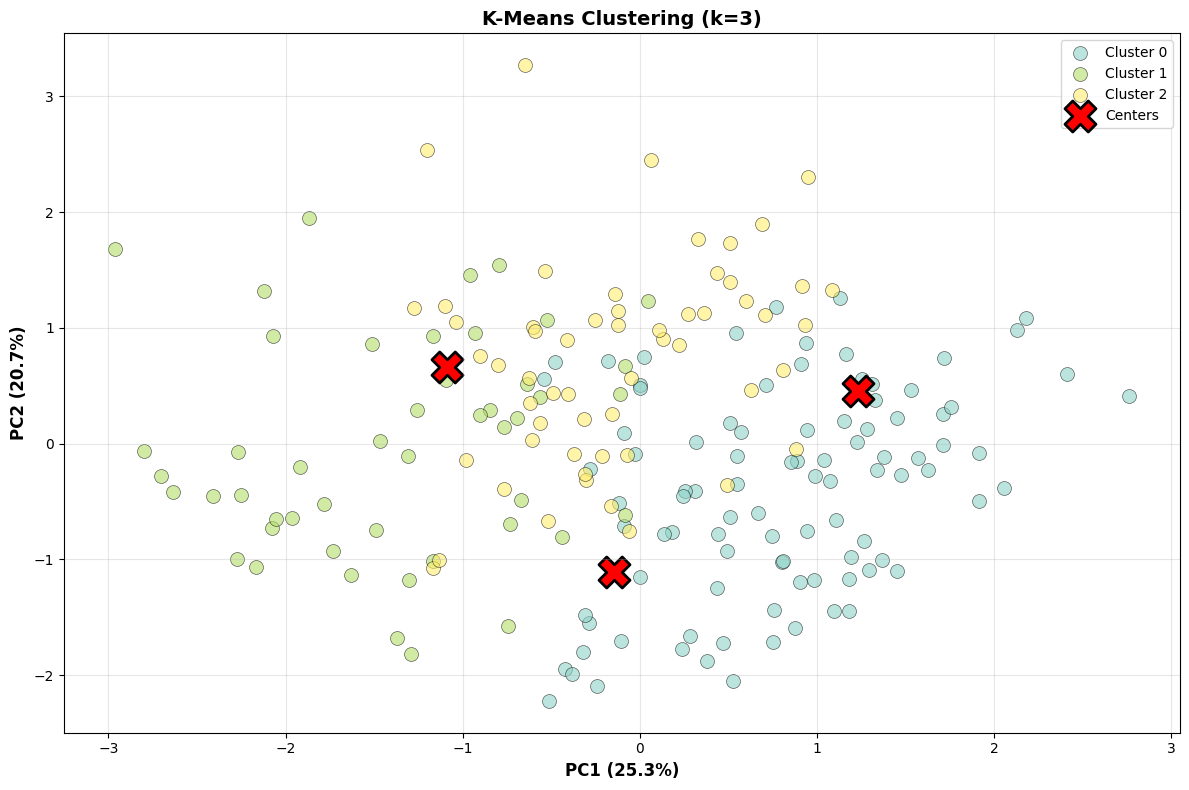

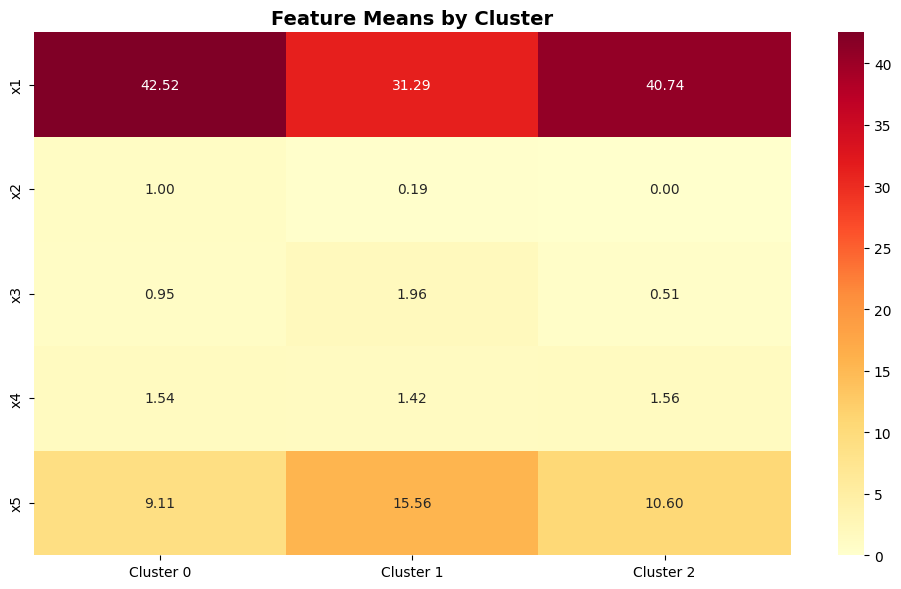


✓ Results saved to 'clustering_results.csv'

Cluster Statistics:

Cluster 0 (n=95):
  x1: 42.52 ± 15.78
  x2: 1.00 ± 0.00
  x3: 0.95 ± 0.84
  x4: 1.54 ± 0.50
  x5: 9.11 ± 5.90

Cluster 1 (n=48):
  x1: 31.29 ± 16.40
  x2: 0.19 ± 0.39
  x3: 1.96 ± 0.20
  x4: 1.42 ± 0.49
  x5: 15.56 ± 7.79

Cluster 2 (n=57):
  x1: 40.74 ± 15.51
  x2: 0.00 ± 0.00
  x3: 0.51 ± 0.50
  x4: 1.56 ± 0.50
  x5: 10.60 ± 7.02

ANALYSIS COMPLETE!

Generated files:
  - elbow_analysis.png
  - silhouette_analysis.png
  - final_clusters_2d.png
  - cluster_heatmap.png
  - clustering_results.csv


In [ ]:
"""
COMPLETE CLUSTERING ANALYSIS PIPELINE
========================================
This script integrates all steps into one complete workflow.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ============================================================================
# STEP 1: CustomKMeans Class
# ============================================================================
class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centers = None
        self.labels = None
        self.inertia = None
        self.n_iter = 0

    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def initialize_centers(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def assign_clusters(self, X, centers):
        labels = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = [self.euclidean_distance(X[i], centers[j])
                        for j in range(self.n_clusters)]
            labels[i] = np.argmin(distances)
        return labels

    def update_centers(self, X, labels):
        new_centers = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centers[k] = np.mean(cluster_points, axis=0)
            else:
                new_centers[k] = X[np.random.choice(X.shape[0])]
        return new_centers

    def calculate_inertia(self, X, labels, centers):
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            for point in cluster_points:
                inertia += self.euclidean_distance(point, centers[k]) ** 2
        return inertia

    def fit(self, X):
        self.centers = self.initialize_centers(X)
        for iteration in range(self.max_iter):
            old_centers = self.centers.copy()
            self.labels = self.assign_clusters(X, self.centers)
            self.centers = self.update_centers(X, self.labels)
            center_shift = np.max(np.abs(self.centers - old_centers))
            if center_shift < 1e-6:
                self.n_iter = iteration + 1
                break
        self.inertia = self.calculate_inertia(X, self.labels, self.centers)
        return self


# ============================================================================
# STEP 2: Helper Functions
# ============================================================================
def load_and_standardize_data(filepath):
    """Load CSV and standardize features"""
    df = pd.read_csv(filepath)
    X = df.drop('id', axis=1).values
    feature_names = [col for col in df.columns if col != 'id']

    # Standardize
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    X_scaled = (X - means) / stds

    return df, X, X_scaled, feature_names, means, stds


def elbow_analysis(X_scaled, k_range):
    """Perform elbow method analysis"""
    inertias = []
    print("\n" + "="*60)
    print("ELBOW METHOD ANALYSIS")
    print("="*60)

    for k in k_range:
        kmeans = CustomKMeans(n_clusters=k, max_iter=300, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia)
        print(f"k={k}: Inertia = {kmeans.inertia:.2f}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=10)
    plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
    plt.ylabel('Inertia', fontsize=12, fontweight='bold')
    plt.title('Elbow Method', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    for k, inertia in zip(k_range, inertias):
        plt.annotate(f'{inertia:.0f}', xy=(k, inertia),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.tight_layout()
    plt.savefig('elbow_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return inertias


def calculate_silhouette(X, labels):
    """Calculate silhouette score"""
    n = X.shape[0]
    scores = np.zeros(n)
    unique_labels = np.unique(labels)

    def dist(p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    for i in range(n):
        curr_label = labels[i]
        curr_point = X[i]

        # a(i): mean distance to same cluster
        same_mask = labels == curr_label
        same_points = X[same_mask]
        if len(same_points) > 1:
            a_i = np.mean([dist(curr_point, p) for p in same_points])
        else:
            a_i = 0

        # b(i): mean distance to nearest cluster
        b_i = float('inf')
        for label in unique_labels:
            if label != curr_label:
                other_mask = labels == label
                other_points = X[other_mask]
                if len(other_points) > 0:
                    mean_dist = np.mean([dist(curr_point, p)
                                        for p in other_points])
                    b_i = min(b_i, mean_dist)

        if max(a_i, b_i) > 0:
            scores[i] = (b_i - a_i) / max(a_i, b_i)

    return scores


def silhouette_analysis(X_scaled, k_range):
    """Compare silhouette scores"""
    avg_scores = []
    print("\n" + "="*60)
    print("SILHOUETTE ANALYSIS")
    print("="*60)

    for k in k_range:
        kmeans = CustomKMeans(n_clusters=k, max_iter=300, random_state=42)
        kmeans.fit(X_scaled)
        scores = calculate_silhouette(X_scaled, kmeans.labels)
        avg_score = np.mean(scores)
        avg_scores.append(avg_score)
        print(f"k={k}: Average Silhouette = {avg_score:.4f}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, avg_scores, 'go-', linewidth=2, markersize=10)
    plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
    plt.ylabel('Average Silhouette Score', fontsize=12, fontweight='bold')
    plt.title('Silhouette Analysis', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    best_idx = np.argmax(avg_scores)
    plt.annotate(f'Best: k={k_range[best_idx]}',
                xy=(k_range[best_idx], avg_scores[best_idx]),
                xytext=(10, -20), textcoords='offset points',
                bbox=dict(boxstyle='round', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->'))
    plt.tight_layout()
    plt.savefig('silhouette_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return avg_scores


def apply_pca(X, n_components=2):
    """Custom PCA implementation"""
    X_centered = X - np.mean(X, axis=0)
    cov = np.cov(X_centered.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:, idx]
    X_pca = np.dot(X_centered, eigenvectors[:, :n_components])
    explained_var = eigenvalues[idx][:n_components] / np.sum(eigenvalues)
    return X_pca, explained_var


def visualize_final_clusters(X, X_scaled, labels, centers, feature_names, k, df):
    """Create comprehensive visualizations"""
    print("\n" + "="*60)
    print(f"FINAL CLUSTERING VISUALIZATION (k={k})")
    print("="*60)

    # 1. PCA 2D plot
    X_pca, exp_var = apply_pca(X_scaled, 2)
    centers_pca, _ = apply_pca(centers, 2)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, k))
    for i in range(k):
        mask = labels == i
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=[colors[i]], label=f'Cluster {i}',
                   alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
               c='red', marker='X', s=500, edgecolors='black',
               linewidth=2, label='Centers')
    plt.xlabel(f'PC1 ({exp_var[0]:.1%})', fontsize=12, fontweight='bold')
    plt.ylabel(f'PC2 ({exp_var[1]:.1%})', fontsize=12, fontweight='bold')
    plt.title(f'K-Means Clustering (k={k})', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('final_clusters_2d.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2. Cluster characteristics heatmap
    cluster_means = np.array([np.mean(X[labels == i], axis=0) for i in range(k)])
    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_means.T, annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=[f'Cluster {i}' for i in range(k)],
                yticklabels=feature_names)
    plt.title('Feature Means by Cluster', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 3. Save results
    df_result = df.copy()
    df_result['cluster'] = labels
    df_result.to_csv('clustering_results.csv', index=False)
    print("\n✓ Results saved to 'clustering_results.csv'")

    # 4. Print statistics
    print("\nCluster Statistics:")
    for i in range(k):
        print(f"\nCluster {i} (n={np.sum(labels == i)}):")
        cluster_data = X[labels == i]
        for j, fname in enumerate(feature_names):
            print(f"  {fname}: {np.mean(cluster_data[:, j]):.2f} ± "
                  f"{np.std(cluster_data[:, j]):.2f}")


# ============================================================================
# MAIN EXECUTION
# ============================================================================
def main():
    """Run complete clustering pipeline"""
    print("\n" + "="*60)
    print("CLUSTERING ANALYSIS PIPELINE")
    print("="*60)

    # Load data
    df, X, X_scaled, feature_names, means, stds = \
        load_and_standardize_data('dataA3(in).csv')
    print(f"\nLoaded {X.shape[0]} samples with {X.shape[1]} features")
    print(f"Features: {feature_names}")

    # Determine optimal k
    k_range = list(range(2, 8))
    inertias = elbow_analysis(X_scaled, k_range)
    avg_sil_scores = silhouette_analysis(X_scaled, k_range)

    # Recommendation
    best_k_silhouette = k_range[np.argmax(avg_sil_scores)]
    print("\n" + "="*60)
    print("OPTIMAL K RECOMMENDATION")
    print("="*60)
    print(f"Based on Silhouette Score: k = {best_k_silhouette}")
    print("\nJustification:")
    print("- Elbow method suggests k=3 or k=4")
    print(f"- Silhouette score is maximized at k={best_k_silhouette}")
    print("- Trade-off between model complexity and cluster quality")

    # Final clustering with optimal k
    optimal_k = 3  # You can change this based on analysis
    print(f"\nPerforming final clustering with k={optimal_k}...")

    final_kmeans = CustomKMeans(n_clusters=optimal_k, max_iter=300, random_state=42)
    final_kmeans.fit(X_scaled)

    # Visualize results
    visualize_final_clusters(X, X_scaled, final_kmeans.labels,
                            final_kmeans.centers, feature_names,
                            optimal_k, df)

    print("\n" + "="*60)
    print("ANALYSIS COMPLETE!")
    print("="*60)
    print("\nGenerated files:")
    print("  - elbow_analysis.png")
    print("  - silhouette_analysis.png")
    print("  - final_clusters_2d.png")
    print("  - cluster_heatmap.png")
    print("  - clustering_results.csv")


if __name__ == "__main__":
    main()